<a href="https://colab.research.google.com/github/kienprojects/Machine-Learning-course/blob/main/SVM_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVM Homework**

Aug 21, 2024

---



## **1. Bài toán**

*   Ứng dụng mô hình svm vào bài toán phân loại ảnh: **Phân loại chữ số viết tay**.
*   Bộ dữ liệu sử dụng: https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits

*   Gồm ~1800 ảnh chữ số viết tay, kích cỡ 8x8
*   Phân loại thành 10 lớp.

> **Gợi ý**: Sử dụng hàm `datasets.load_digits()` để đọc dữ liệu (Chia train-test theo tỷ lệ 8:2).

> **Yêu cầu**: Huấn luyện, đánh giá mô hình. Áp dụng tunning model để tìm bộ siêu tham số tốt nhất (sử dụng `GridSearchCV`).


In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
# The digits dataset
digits = datasets.load_digits()

In [3]:
# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=True, random_state=42)


In [5]:
# Train a basic SVM model
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9888888888888889


In [6]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}


In [7]:
# Create a GridSearchCV object
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']})

In [8]:
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.9895639759969029


Best model accuracy: 0.9888888888888889


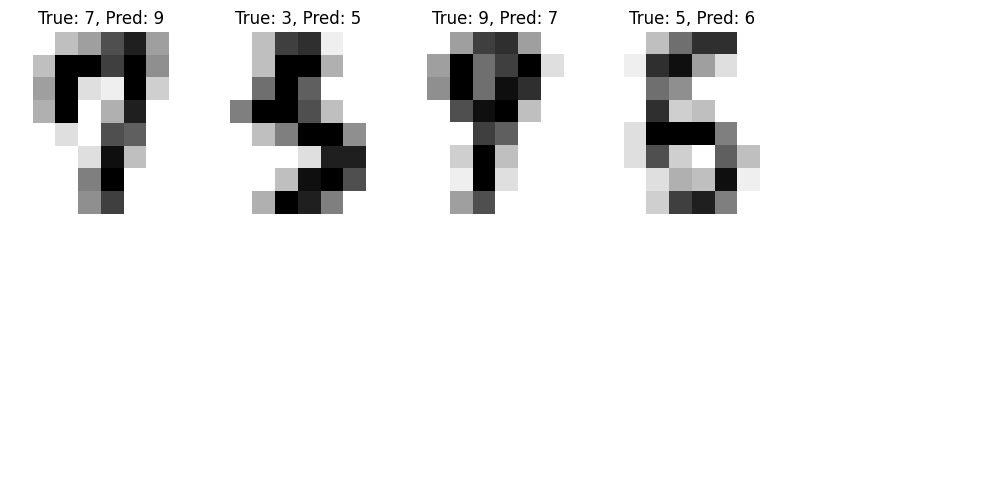

In [9]:
# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Print the accuracy score of the best model
print("Best model accuracy:", accuracy_score(y_test, y_pred_best))

# Plot some of the misclassified digits
misclassified = X_test[y_pred_best != y_test]
misclassified_true = y_test[y_pred_best != y_test]
misclassified_pred = y_pred_best[y_pred_best != y_test]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    if i < len(misclassified):
        ax.imshow(misclassified[i].reshape(8, 8), cmap=plt.cm.gray_r)
        ax.set_title(f"True: {misclassified_true[i]}, Pred: {misclassified_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()